In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = LabelEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


import warnings 
warnings.filterwarnings('ignore')

In [4]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import xgboost
import eli5
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
import joblib
import re

In [9]:
df = pd.read_csv('All_News.csv') # Have combined fake and real news into a one excel sheet

In [10]:
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",False
...,...,...,...,...,...
44914,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
44915,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
44916,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
44917,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


# Data Preprocessing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44919 non-null  object
 1   text     44919 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44919 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.4+ MB


In [12]:
df.isnull().sum() # Checking Null values in the data

title       0
text        0
subject    21
date       21
label       0
dtype: int64

In [13]:
df = df.dropna() # dropping Null Values

In [14]:
df.isnull().sum() # there are no null values in the data

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [15]:
df['label'].value_counts() # checking whether the data is balanced or not

False    23481
True     21417
Name: label, dtype: int64

Data is balance

In [16]:
df['label'] = enc.fit_transform(df['label']) #Enconding label to 0 and 1 where 0 refers to False and 1 refers to True

In [17]:
df['label'].value_counts()

0    23481
1    21417
Name: label, dtype: int64

In [18]:
df.duplicated().sum() # Checking duplicate values in the data

219

In [19]:
df = df.drop_duplicates(keep='first') # Deleting duplicate values from the data

In [20]:
df.duplicated().sum()

0

# EDA

In [21]:
df['title_Char_length'] = df['title'].apply(len) # creating column to check the length of characters in title

In [28]:
df['title_words_length'] = df['title'].apply(lambda x:len(nltk.word_tokenize(x))) # creating column to check the length of words in title

In [22]:
df['text_words_length'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # creating column to check the length of words text 

In [23]:
df['text_sentences_length'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # creating column to check the length of sentences text

In [29]:
df.describe()

,label,title_Char_length,text_words_length,text_sentences_length,title_words_length
count,44679.000000,44679.000000,44679.000000,44679.000000,44679.000000
mean,0.474742,81.674702,444.991987,14.751740,13.837127
std,0.499367,27.169303,363.344095,12.264873,4.814365
min,0.000000,7.000000,0.000000,0.000000,1.000000
25%,0.000000,63.000000,224.000000,7.000000,10.000000
50%,0.000000,74.000000,400.000000,13.000000,13.000000
75%,1.000000,93.000000,566.000000,19.000000,16.000000
max,1.000000,480.000000,9957.000000,313.000000,69.000000


By looking at max value of V2_Char_length, V2_words_length and V2_sentences_length we can conclude that there are big mails and messages present in the data

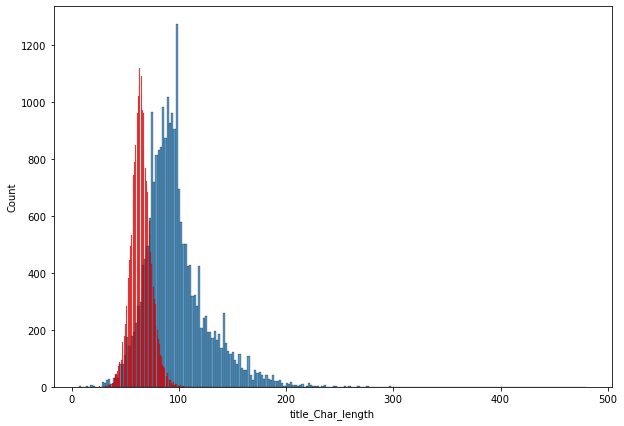

In [25]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['label'] == 0]['title_Char_length'])
sns.histplot(df[df['label'] == 1]['title_Char_length'],color='red')
plt.show()

Observation - 

- Fake news title contain more number of characters than real news titles

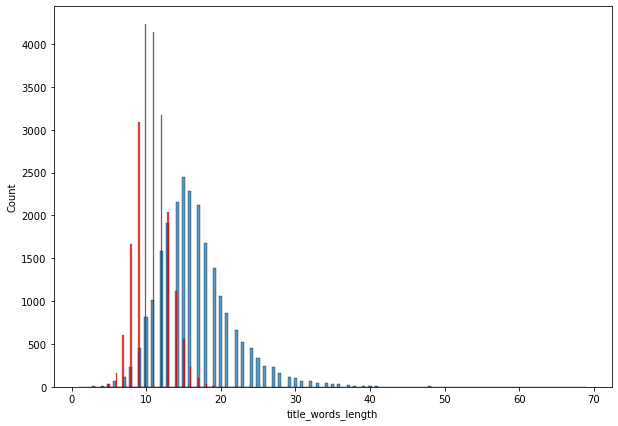

In [30]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['label'] == 0]['title_words_length'])
sns.histplot(df[df['label'] == 1]['title_words_length'],color='red')
plt.show()

Observation - 

- Fake news title contain more number of words than real news

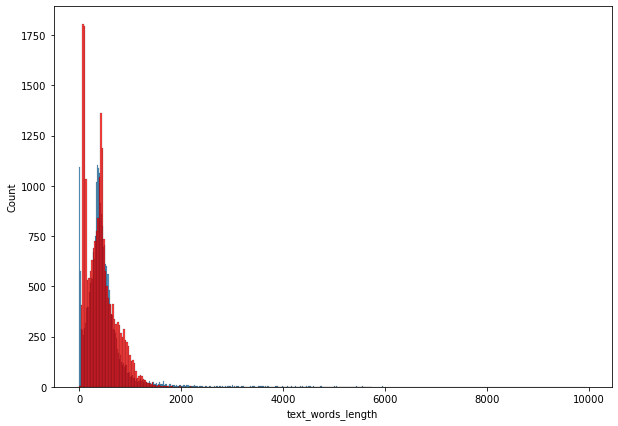

In [26]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['label'] == 0]['text_words_length'])
sns.histplot(df[df['label'] == 1]['text_words_length'],color='red')
plt.show()

Observation -

- It is little difficult to conclude whether words in the text plays and important role in concluding the fake or real news

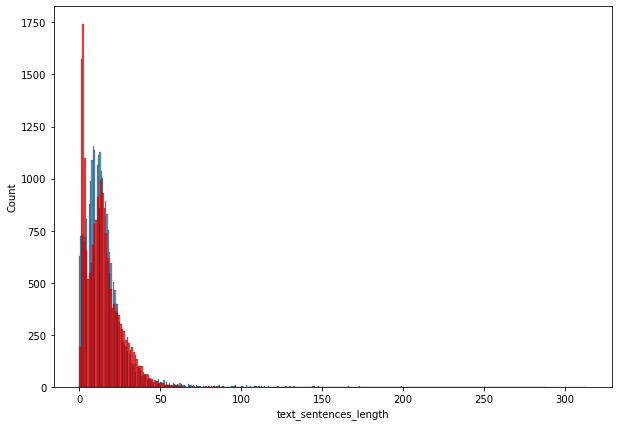

In [27]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['label'] == 0]['text_sentences_length'])
sns.histplot(df[df['label'] == 1]['text_sentences_length'],color='red')
plt.show()

Observation -

- as we can see the spike in the real news length quantity we can conclude real news tend to use less number of sentences

# Data Processing

In [20]:
def text_transform(text): # defining fuction to clean the data
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(PorterStemmer().stem(i))
    
    return " ".join(y)

In [21]:
df

,subject,date,label,title_Char_length,text_words_length,text_sentences_length,title_words_length,transform_text,transform_title
0,News,"December 31, 2017",0,81,599,28,13,donald trump wish american happi new year leav...,donald trump send embarrass new eve messag dis...
1,News,"December 31, 2017",0,69,331,11,8,hous intellig committe chairman devin nune go ...,drunk brag trump staffer start russian collus ...
2,News,"December 30, 2017",0,94,689,25,15,friday reveal former milwauke sheriff david cl...,sheriff david clark becom internet joke threat...
3,News,"December 29, 2017",0,80,519,15,16,christma day donald trump announc would back w...,trump obsess even name code websit imag
4,News,"December 25, 2017",0,70,458,19,11,pope franci use annual christma day messag reb...,pope franci call donald trump christma speech
...,...,...,...,...,...,...,...,...,...
44039,worldnews,"August 22, 2017",1,61,505,15,10,brussel reuter nato alli tuesday welcom presid...,commit nato back new approach afghanistan
44040,worldnews,"August 22, 2017",1,52,142,6,7,london reuter lexisnexi provid legal regulator...,lexisnexi withdrew two product chines market
44041,worldnews,"August 22, 2017",1,49,358,16,7,minsk reuter shadow disus factori minsk street...,minsk cultur hub becom author
44042,worldnews,"August 22, 2017",1,61,224,8,9,moscow reuter vatican secretari state cardin p...,vatican upbeat possibl pope franci visit russia


In [34]:
df['transform_text'] = df['text'].apply(text_transform) # Applying text_transform define function to data and creating new column for transformed data

In [35]:
df['transform_title'] = df['title'].apply(text_transform) # Applying text_transform define function to data and creating new column for transformed data

In [38]:
df.to_csv('New_All_News.csv')

In [13]:
df = pd.read_csv('New_All_News.csv')

In [14]:
df.isna().sum() # checking the Null values

Unnamed: 0                 0
title                      0
text                       0
subject                    0
date                       0
label                      0
title_Char_length          0
text_words_length          0
text_sentences_length      0
title_words_length         0
transform_text           632
transform_title            3
dtype: int64

In [15]:
df = df.dropna() # dropping the null values since they are very low in the number

In [16]:
df.isna().sum() # no null values present

Unnamed: 0               0
title                    0
text                     0
subject                  0
date                     0
label                    0
title_Char_length        0
text_words_length        0
text_sentences_length    0
title_words_length       0
transform_text           0
transform_title          0
dtype: int64

In [17]:
df = df.reset_index()

In [18]:
df = df.drop(['index','Unnamed: 0','title','text'],axis=1)

In [22]:
df['transform_subject'] = df['subject'].apply(text_transform) # Applying text_transform define function to data and creating new column for transformed data

In [23]:
df = df.drop(['title_Char_length','text_words_length','text_sentences_length','title_words_length'],axis=1)

In [24]:
df = df.drop(['subject'],axis=1)

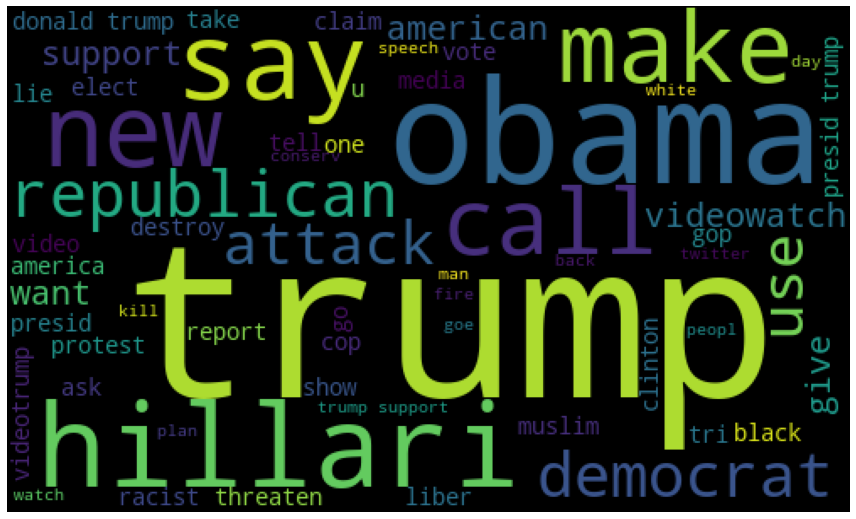

In [25]:
x1 = df['transform_title'][df['label']==0]
x2 = WordCloud(width=500, height=300, max_words=60).generate(''.join(x1))
plt.figure(figsize=(12,10))
plt.imshow(x2)
plt.axis('off')
plt.tight_layout()
plt.show()

Observations -

- fake news title mostly contains this words like say, trump, obama, attack, call etc.

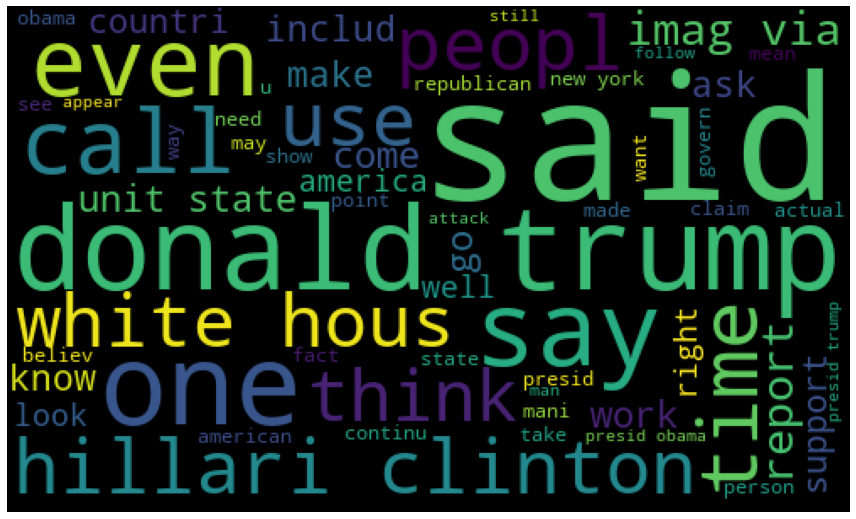

In [11]:
x1 = df['transform_text'][df['label']==0]
x2 = WordCloud(width=500, height=300, max_words=60).generate(''.join(x1))
plt.figure(figsize=(12,10))
plt.imshow(x2)
plt.axis('off')
plt.tight_layout()
plt.show()

Observations - 

- fake news mostly contains this words like said, donald trump, call, hillari, clinton ect.

In [25]:
cv = CountVectorizer()


X = cv.fit_transform(df['transform_title']).toarray() # converting data into vectors by using CountVectorizer and setting it for train data

In [28]:
Y.shape

(44044,)

In [26]:
Y = df['label'].values # Assigning test data to variable Y

In [27]:
X.shape

(44044, 12865)

# Model Building

In [19]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):  # Defining fuction for model building
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        print('\n=========================================')
        
        con_mat = confusion_matrix(y_test, pred)
        print('\nconfusion Matrix- \n', con_mat)
        print('\n=========================================')

In [20]:
gnb = GaussianNB() 
mnb = MultinomialNB() 
bnb = BernoulliNB()

## GaussianNB

In [21]:
maxAccu =0  # Checking the highest test accuracy with range of random_state from 1-100
maxRS= 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = i)
    gnb = GaussianNB()
    gnb.fit(x_train,y_train)
    y_pred=gnb.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.820543093270366 Random_state 1
max_accuracy 0.820543093270366 max_Random_state 1
accuracy 0.8223594587230951 Random_state 2
max_accuracy 0.8223594587230951 max_Random_state 2
accuracy 0.8244482789937335 Random_state 3
max_accuracy 0.8244482789937335 max_Random_state 3
accuracy 0.8278085550812824 Random_state 4
max_accuracy 0.8278085550812824 max_Random_state 4
accuracy 0.8272636454454636 Random_state 5
accuracy 0.8204522749977295 Random_state 6
accuracy 0.820543093270366 Random_state 7
accuracy 0.8238125510852784 Random_state 8
accuracy 0.8249023703569158 Random_state 9
accuracy 0.8193624557260921 Random_state 10
accuracy 0.820543093270366 Random_state 11
accuracy 0.8200890019071837 Random_state 12
accuracy 0.8278993733539188 Random_state 13
max_accuracy 0.8278993733539188 max_Random_state 13
accuracy 0.8204522749977295 Random_state 14
accuracy 0.8196349105440015 Random_state 15
accuracy 0.8238125510852784 Random_state 16
accuracy 0.8202706384524566 Random_state 17
accuracy 

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 96)

In [23]:
gnb = GaussianNB() 
gnb.fit(x_train,y_train)

print_score(gnb,x_train,x_test,y_train,y_test, train=True)
print_score(gnb,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 86.02%

===============Test Result===============
Accuracy Score: 83.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.71      0.81      5642
           1       0.76      0.95      0.85      5369

    accuracy                           0.83     11011
   macro avg       0.85      0.83      0.83     11011
weighted avg       0.85      0.83      0.83     11011



confusion Matrix- 
 [[4014 1628]
 [ 244 5125]]



## MultinomialNB

In [24]:
mnb = MultinomialNB() 
mnb.fit(x_train,y_train)

print_score(mnb,x_train,x_test,y_train,y_test, train=True)
print_score(mnb,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 94.57%

===============Test Result===============
Accuracy Score: 93.72%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      5642
           1       0.94      0.93      0.93      5369

    accuracy                           0.94     11011
   macro avg       0.94      0.94      0.94     11011
weighted avg       0.94      0.94      0.94     11011



confusion Matrix- 
 [[5342  300]
 [ 392 4977]]



## BernoulliNB

In [25]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

print_score(bnb,x_train,x_test,y_train,y_test, train=True)
print_score(bnb,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 94.70%

===============Test Result===============
Accuracy Score: 93.93%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      5642
           1       0.94      0.94      0.94      5369

    accuracy                           0.94     11011
   macro avg       0.94      0.94      0.94     11011
weighted avg       0.94      0.94      0.94     11011



confusion Matrix- 
 [[5299  343]
 [ 325 5044]]



## LogisticRegression

In [26]:
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 97.25%

===============Test Result===============
Accuracy Score: 94.64%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      5642
           1       0.94      0.95      0.95      5369

    accuracy                           0.95     11011
   macro avg       0.95      0.95      0.95     11011
weighted avg       0.95      0.95      0.95     11011



confusion Matrix- 
 [[5321  321]
 [ 269 5100]]



## KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 75.99%

===============Test Result===============
Accuracy Score: 68.81%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.63      0.93      0.75      5642
           1       0.86      0.43      0.57      5369

    accuracy                           0.69     11011
   macro avg       0.75      0.68      0.66     11011
weighted avg       0.74      0.69      0.67     11011



confusion Matrix- 
 [[5274  368]
 [3066 2303]]



## GradientBoostingClassifier

In [28]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 82.49%

===============Test Result===============
Accuracy Score: 82.11%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.68      0.80      5642
           1       0.74      0.96      0.84      5369

    accuracy                           0.82     11011
   macro avg       0.85      0.82      0.82     11011
weighted avg       0.85      0.82      0.82     11011



confusion Matrix- 
 [[3863 1779]
 [ 191 5178]]



Tried using below ML models but it was taking too long to run hence was not able to run those algorithms 

- SupportVectorClassifier
- DecisionTreeClassifier
- RandomForestClassifier

## Conclusion

In [5]:
scores = pd.DataFrame({
    'Model_Name':['GradientBoostingClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'BernoulliNB', 'MultinomialNB', 'GaussianNB'],
    'Accuracy':[82.11, 68.81, 94.64, 93.93, 93.72, 83.00],
    'Precision_Score':[0.95, 0.63, 0.95, 0.94, 0.93, 0.94],
    'Confusion_Matrix_FP':[1779, 368, 321, 343, 300, 1628]
})

In [9]:
scores.sort_values(by=['Confusion_Matrix_FP'])

,Model_Name,Accuracy,Precision_Score,Confusion_Matrix_FP
4,MultinomialNB,93.72,0.93,300
2,LogisticRegression,94.64,0.95,321
3,BernoulliNB,93.93,0.94,343
1,KNeighborsClassifier,68.81,0.63,368
5,GaussianNB,83.00,0.94,1628
0,GradientBoostingClassifier,82.11,0.95,1779


##### 1. Since every ML model are giving good results then we should focus on false positive Confusion Matrix
##### 2. MultinomialNB has the lowest false positive Confusion Matrix with high Accuracy hence selecting MultinomialNB for further Hyper Parameter Tuning.

# Hyper Parameter Tuning

In [31]:
grid_param = {                                      # creating grid for hyper parameters
    'fit_prior': [True, False],
    'alpha': range(1,3)
}

In [32]:
bnb = BernoulliNB()

In [33]:
grid_search = GridSearchCV(estimator=bnb,          # assigning SVC model to search grid CV
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

In [34]:
grid_search.fit(x_train,y_train)  # searching best parameters

MemoryError: Unable to allocate 1.06 GiB for an array with shape (11011, 12865) and data type int64

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
svc = SVC(C= 1, decision_function_shape= 'ovo', gamma= 'scale', kernel= 'rbf')  # applying best parameters 
svc.fit(x_train,y_train)                                                        # Keeping kernel as rbf since we want high precision   

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)

# Saving Model

In [ ]:
file = 'Fake_News_Classifier.pickle'
pickle.dump(bnb, open(file, 'wb'))

# Notes

1. Not using text files since it too big to handle hence have only used titles to predict the outcome however it will be same for the text
2. Not able to do hyperparameter tunning since the file size is too big and it is showing the error however the code is correct